# Sistemas Inteligentes

## Laboratório 3 - Redução de Dimensionalidade e Regressão

Algoritmos de Redução de dimensionalidade:
- Principal Component Analysis (PCA)
- Independent Component Analysis (ICA)
- Isometric Mapping (Isomap)
- T-Distributed Stochastic Neighbor Embedding (TSNE)

Modelos de regressão linear:
- Least Squares
- Ridge
- Lasso
- Lasso Least-angle regression (LARS)
- RANdom SAmple Consensus (RANSAC)
- Theil-Sen

### Identificação do Aluno

#### Nome Completo

Daniel Escudero

#### RA

11005716

## Importação e preparação dos dados

Importe o dataset de pacientes diabéticos da biblioteca Scikit (load_diabetes) e separe os dados entre atributos (X) e saídas (y).

In [95]:
from sklearn import datasets

(x, y) = datasets.load_diabetes(return_X_y=True)

Mostre os formatos da variável de atributos e da variável de saídas.

In [96]:
print(x.shape)

(442, 10)


In [97]:
print(y.shape)

(442,)


## Redução de Dimensionalidade

Importe e aplique as funções de redução de dimensionalidade (PCA, FastICA, Isomap e TSNE) para reduzir a dimensionalidade a apenas uma feature.

In [98]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap, TSNE

# PCA #
pca = PCA(n_components=1)
x_pca = pca.fit_transform(x)

# FastICA #
fastICA = FastICA(n_components=1)
x_fastICA = fastICA.fit_transform(x)

# Isomap #
isomap = Isomap(n_components=1)
x_isomap = isomap.fit_transform(x)

# TSNE #
tsne = TSNE(n_components=1)
x_tsne = tsne.fit_transform(x)

Mostre o formato da nova variável de atributos após a redução de dimensionalidade para cada algoritmo.

In [99]:
print(x_pca.shape)

(442, 1)


In [100]:
print(x_fastICA.shape)

(442, 1)


In [101]:
print(x_isomap.shape)

(442, 1)


In [102]:
print(x_tsne.shape)

(442, 1)


### Caso mais simples

Faça a separação dos dados para treinamento e teste. Reserve 20% dos dados para teste.

In [103]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_pca, y, test_size=0.2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(353, 1) (89, 1) (353,) (89,)


Importe o regressor linear e utilize-o para gerar um modelo, então faça uma regressão com os dados de teste.

In [104]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)
y_pred = linear_regressor.predict(x_test)

Importe as funções de erro quadrático médio (MSE) e o coeficiente de determinação (R²), então imprima o MSE e o R².

In [105]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 4084.6587117904246
R2: 0.37163016844817576


Então exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada.

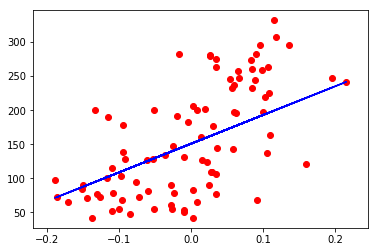

In [106]:
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='blue')

plt.show()

### Comparando Métodos de Redução de Dimensionalidade

Agora, a fim de comparar com outras técnicas, crie um método iterativo que realize as etapas de separação dos dados entre treinamento e teste, gere um modelo de regressão linear, faça a predição com base nos dados de testes e calcule o erro quadrático médio e o coeficiente de determinação para cada iteração. Então, calcule os valores mínimo, médio, máximo e desvio padrão para cada uma dessas duas métricas. Por fim, plote os histogramas (com 100 bins) das duas métricas. Use 10000 (dez mil) iterações.

In [107]:
from statistics import mean, stdev, median


def getPredictions(x_train, y_train, x_test):
    linear_regressor = LinearRegression()
    linear_regressor.fit(x_train, y_train)
    return linear_regressor.predict(x_test)

def getScores(x, y):
    MSEs = []
    R2s = []
    totalIterations = 10000
    
    for i in range(totalIterations):
        # Split data
        x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)
        
        # Predict
        y_pred = getPredictions(x_train, y_train, x_test)
        
        # Get scores
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Save scores
        MSEs.append(mse)
        R2s.append(r2)
    
    return (MSEs, R2s)

def printStatistics(values):
    print('Mínimo        %.2f' %min(values))
    print('Mediana       %.2f' %median(values))
    print('Máximo        %.2f' %max(values))
    print('Média         %.2f' %mean(values))
    print('Desvio Padrão %.2f' %stdev(values))

def plotMetrics(MSEs, R2s):
    plt.title('MSE Scores')
    plt.hist(MSEs,bins=100)
    plt.show()
    
    plt.title('R2 Scores')
    plt.hist(R2s,bins=100)
    plt.show()

def runTests(x, y):
    # Run linear regressor; Get scores
    (MSEs, R2s) = getScores(x, y)
    
    # Print statistics (min, max, avg, stdev)
    print('MSE:')
    printStatistics(MSEs)
    
    print('======')
    
    print('R2:')
    printStatistics(R2s)
    
    # Plot metrics
    plotMetrics(MSEs, R2s)    

#### PCA

MSE:
Mínimo        2589.51
Mediana       4121.62
Máximo        6254.97
Média         4136.55
Desvio Padrão 481.99
R2:
Mínimo        -0.12
Mediana       0.30
Máximo        0.53
Média         0.29
Desvio Padrão 0.07


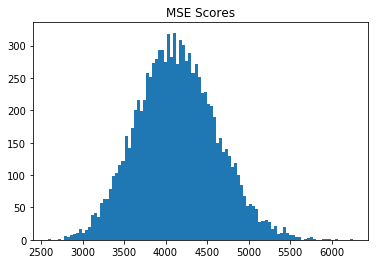

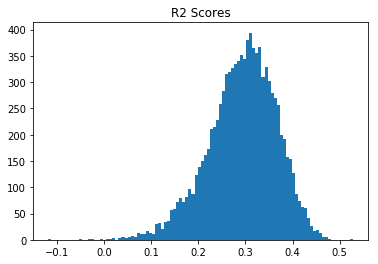

In [108]:
runTests(x_pca, y)

#### ICA

MSE:
Mínimo        2591.18
Mediana       4137.07
Máximo        6189.13
Média         4148.60
Desvio Padrão 476.71
R2:
Mínimo        -0.13
Mediana       0.30
Máximo        0.51
Média         0.29
Desvio Padrão 0.07


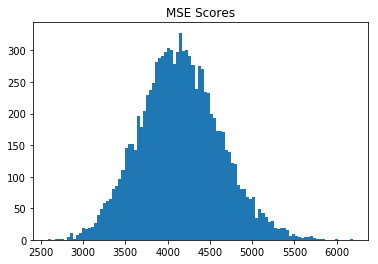

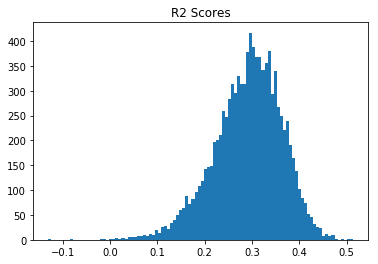

In [109]:
runTests(x_fastICA, y)

#### Isomap

In [ ]:
runTests(x_isomap, y)

#### TSNE

In [ ]:
runTests(x_tsne, y)

### Comparando modelos de Regressão

Exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada em cada caso.

In [ ]:
from sklearn.linear_model import Ridge, Lasso, LassoLars, BayesianRidge, RANSACRegressor, TheilSenRegressor

pca = PCA(n_components=1)
x_pca = pca.fit_transform(x)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_pca, y, test_size=0.2)

def getPredictions (model):
    model.fit(x_train, y_train)
    return model.predict(x_test)

def plotScatters ():
    plt.scatter(x_test[:,0], y_test, color='red')

def plot(model, label, keepSamePlot=False, color='blue'):
    y_pred = getPredictions(model)
    
    plt.plot(x_test, y_pred, color=color, label=label)

    if (not keepSamePlot):
        plotScatters()
        plt.title(label)
        plt.show()

#### Least Squares

In [ ]:
plot(LinearRegression(), 'Least Squares')

#### Ridge

In [ ]:
plot(Ridge(), 'Ridge')

#### Lasso

In [ ]:
plot(Lasso(), 'Lasso')

#### Lasso LARS

In [ ]:
plot(LassoLars(), 'LassoLars')

#### Bayesian Ridge

In [ ]:
plot(BayesianRidge(), 'BayesianRidge')

#### RANSAC

In [ ]:
plot(RANSACRegressor(), 'RANSACRegressor')

#### Theil-Sen

In [ ]:
plot(TheilSenRegressor(), 'TheilSenRegressor')

### Gráfico geral comparativo

Em uma mesma figura, mostre novamente o gráfico de dispersão dos dados e plote cada um dos modelos gerados utilizando cada técnica deste laboratório. Atente-se a fazer com que o gráfico seja suficientemente autoexplicativo, então utilize diferentes cores, insira uma legenda etc.

In [ ]:
plt.figure(figsize=(12,12))

plot(LinearRegression(), 'LinearRegressorion', True, 'blue')
plot(Ridge(), 'Ridge', True, 'red')
plot(Lasso(), 'Lasso', True, 'yellow')
plot(LassoLars(), 'LassoLars', True, 'black')
plot(BayesianRidge(), 'BayesianRidge', True, 'purple')
plot(RANSACRegressor(), 'RANSACRegressor', True, 'gray')
plot(TheilSenRegressor(), 'TheilSenRegressor', True, 'pink')

plotScatters()

plt.title('Gráfico Comparativo')
plt.legend()
plt.show()